In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("../data/titanic_train.csv")

In [5]:
data.shape

(891, 12)

exploring the data and handling the NaN  or null values

data.isnull()  creates the true or false value depending on whether the column is null or not .    
data.isnull().any() returns the true or false corrosponding to a column depending on whether any value is true ;
data.isnull().sum() returns if how many rows are or columns are null .
instead of isnullwe can use isna because isnull is an alias for isna

In [6]:
data.count()



PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
data[data.isnull().any(axis=1)].count()

PassengerId    708
Survived       708
Pclass         708
Name           708
Sex            708
Age            531
SibSp          708
Parch          708
Ticket         708
Fare           708
Cabin           21
Embarked       706
dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data1=pd.read_csv(r"..\data\customized_test.csv",sep=',')

In [10]:
#data1.shape
#data1.info()
#data1.describe()
#data1.sample(5) #random sample of data points
#data1.head(10)
data1.tail(2)


,name,marks,height,weight,status
5,manohar,90.0,167.0,NaN,bad
6,murli,89.0,NaN,NaN,good


In [11]:
data1.head(10)

,name,marks,height,weight,status
0,anmol,80.0,175.0,80.0,good
1,Bihari,78.0,180.0,67.0,avg
2,sunder,NaN,170.0,79.0,good
3,shyam,67.0,NaN,59.0,bad
4,ghamshyam,NaN,156.0,NaN,good
5,manohar,90.0,167.0,NaN,bad
6,murli,89.0,NaN,NaN,good


In [12]:
data1.isnull().sum()

name      0
marks     2
height    2
weight    3
status    0
dtype: int64

In [13]:
data1.isnull().any()

name      False
marks      True
height     True
weight     True
status    False
dtype: bool

In [14]:
data1[data1.isnull().any(axis=1)].count()

name      5
marks     3
height    3
weight    2
status    5
dtype: int64

In [15]:
data2=data1.dropna()

In [16]:
data2.head(10)


,name,marks,height,weight,status
0,anmol,80.0,175.0,80.0,good
1,Bihari,78.0,180.0,67.0,avg


In [17]:
#data2[data2.isnull().any(axis=1)].count()
data2.isnull().sum()

name      0
marks     0
height    0
weight    0
status    0
dtype: int64

In [18]:
data1.dtypes

name       object
marks     float64
height    float64
weight    float64
status     object
dtype: object

In [19]:
list=[colums for colums in data1.columns if data1[colums].dtype =='object']

In [20]:
print(list)

['name', 'status']


In [21]:
for i in list:
    print(data1[i].unique())

['anmol' 'Bihari' 'sunder' 'shyam' 'ghamshyam' 'manohar' 'murli']
['good' 'avg' 'bad']


In [22]:
pd.get_dummies(data1,columns=list[1:],drop_first=True)

,name,marks,height,weight,status_bad,status_good
0,anmol,80.0,175.0,80.0,0,1
1,Bihari,78.0,180.0,67.0,0,0
2,sunder,NaN,170.0,79.0,0,1
3,shyam,67.0,NaN,59.0,1,0
4,ghamshyam,NaN,156.0,NaN,0,1
5,manohar,90.0,167.0,NaN,1,0
6,murli,89.0,NaN,NaN,0,1


In [23]:
def scatter_plot(plot_type,data,column1,column2):
    if plot_type == 'scatter':
        
        fig, ax = plt.subplots(figsize=(12, 8))
        plt.scatter(data[column1],data[column2])
        plt.xlabel(column1)
        plt.ylabel(column2)
    if plot_type == 'crosstab':
        value=pd.crosstab(data[column1],data[column2])
        return value
    if plot_type == 'correlation':
        corr_value=data.corr()
        return corr_value
    if plot_type == 'heatmap':
        fig,ax=plt.subplots(figsize=(10,8))
        value=data.corr()
        sns.heatmap(value,annot=True)
    
        

In [24]:

pd.crosstab(data['Sex'],data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


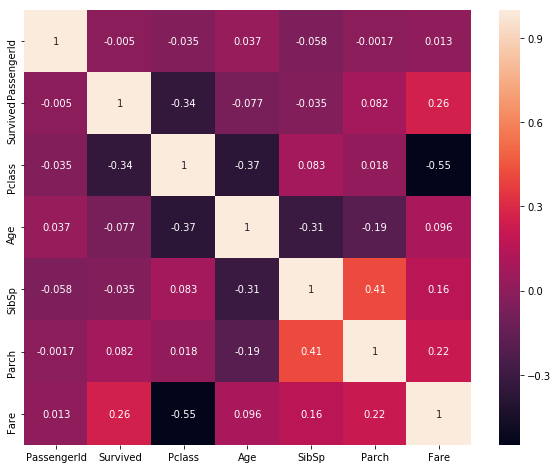

In [25]:
scatter_plot('heatmap',data,'Sex','Survived')

In [26]:
def cols_for_LabelEncoder(data):
    arr=[]
    for col in data.columns:
        d=data[col].unique().size
        if d==2 :
            arr.append(col)
            
    return arr
            

In [27]:
data['Sex'].unique().size

2

In [28]:
d = cols_for_LabelEncoder(data) 


In [29]:
print(d)

['Survived', 'Sex']


In [30]:
from sklearn import preprocessing
 

In [31]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
label_encoder_Sex=preprocessing.LabelEncoder()

In [33]:
data['Sex']=label_encoder_Sex.fit_transform(data['Sex'])

In [34]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [35]:
label_encoder_Sex.classes_

array(['female', 'male'], dtype=object)

In [36]:
data.drop(['Name','Cabin','Ticket','Embarked'],inplace=True,axis=1)

In [37]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.25


In [38]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [39]:
data.shape


(891, 8)

In [40]:
data=data.dropna()

In [41]:
data.shape

(714, 8)

In [42]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
6,7,0,1,1,54.0,0,0,51.8625
7,8,0,3,1,2.0,3,1,21.0750
8,9,1,3,0,27.0,0,2,11.1333
9,10,1,2,0,14.0,1,0,30.0708
10,11,1,3,0,4.0,1,1,16.7000


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#for logistic regression liblinear method uses ovr i.e one vs rest to compute and liblinear uses l2 as well l1 regularization

In [44]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
6,7,0,1,1,54.0,0,0,51.8625
7,8,0,3,1,2.0,3,1,21.0750
8,9,1,3,0,27.0,0,2,11.1333
9,10,1,2,0,14.0,1,0,30.0708
10,11,1,3,0,4.0,1,1,16.7000


In [45]:
data.drop('PassengerId',axis=1,inplace=True)

In [46]:
data.shape

(714, 7)

In [47]:
columns=data.columns

In [48]:
print(columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [49]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [51]:
X_test.shape

(143, 6)

In [52]:
logistic_regression=LogisticRegression(penalty='l2',solver='liblinear')

In [53]:
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred=logistic_regression.predict(X_test)

In [55]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [56]:
pred_results.head(10)

,y_test,y_pred
257,1,1
385,0,0
293,0,1
554,1,1
261,1,0
559,1,0
189,0,0
881,0,0
819,0,0
541,0,0


In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [58]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7762237762237763
precision_score :  0.7678571428571429
recall_score :  0.6935483870967742


In [59]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,68,19
1,13,43


In [60]:
f1_score(y_test,y_pred)

0.7288135593220338

In [61]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [63]:
LDA=LinearDiscriminantAnalysis(solver='lsqr')  #svd,lsqr,eigen

In [64]:
LDA_fit=LDA.fit(X_train,y_train)

In [65]:
LDA_y_predict=LDA_fit.predict(X_test)

In [66]:
lda_crosstab=pd.crosstab(LDA_y_predict,y_test)
lda_crosstab

Survived,0,1
row_0,,
0,67,19
1,14,43


In [67]:
f1_score(y_test,LDA_y_predict)

0.7226890756302521

In [68]:
QDA1=QuadraticDiscriminantAnalysis()


In [69]:
QDA1_fit=QDA1.fit(X_train,y_train)

In [70]:
QDA1_y_predict=QDA1_fit.predict(X_test)

In [71]:
qda_crosstab=pd.crosstab(QDA1_y_predict,y_test)
qda_crosstab

Survived,0,1
row_0,,
0,69,17
1,12,45


In [72]:
f1_score(y_test,QDA1_y_predict)

0.7563025210084033

In [73]:
from sklearn.linear_model import SGDClassifier

In [74]:
SGD=SGDClassifier(loss='log',max_iter=10000) #loss-hinge,log,modified_hubersquared_hinge,percepron,

In [75]:
sgd_fit=SGD.fit(X_train,y_train)

In [76]:
sgd_y_predict=sgd_fit.predict(X_test)

In [77]:
sgd_crosstab=pd.crosstab(sgd_y_predict,y_test)
sgd_crosstab

Survived,0,1
row_0,,
0,33,6
1,48,56


In [78]:
f1_score(y_test,sgd_y_predict)

0.6746987951807228

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

In [80]:
boston=load_boston()

In [81]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [82]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [83]:
print(np.round(boston.data))

[[  0.  18.   2. ...  15. 397.   5.]
 [  0.   0.   7. ...  18. 397.   9.]
 [  0.   0.   7. ...  18. 393.   4.]
 ...
 [  0.   0.  12. ...  21. 397.   6.]
 [  0.   0.  12. ...  21. 393.   6.]
 [  0.   0.  12. ...  21. 397.   8.]]


In [84]:
type(boston)

sklearn.utils.Bunch

In [85]:
bdata=boston.data

In [86]:
type(bdata)

numpy.ndarray

In [87]:
bdata.shape

(506, 13)

In [88]:
bdata.size

6578

In [89]:
target=boston.target

In [90]:
target.shape

(506,)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [92]:
def hyper_param(model,param,X,y):
    if model=='decision_tree':
        GSCV=GridSearchCV(DecisionTreeClassifier(),param,cv=3,return_train_score=True)
        GSCV.fit(X,y)
        return GSCV.best_params_

In [93]:
parameters = {'max_depth': [2, 4, 5, 7, 9, 10,12,14,16]}
tree_best_param=hyper_param('decision_tree',parameters,X_train,y_train)

In [94]:
tree_model=DecisionTreeClassifier(max_depth=2)

In [95]:
result={}

In [96]:
def classificationEval(model,X_train,y_train,X_test,y_test):
    temp_result={}
    model_fit=model.fit(X_train,y_train)
    y_predict=model_fit.predict(X_test)
    temp_result['fscore']=f1_score(y_predict,y_test)
    return temp_result
    

In [97]:
result['tree']=classificationEval(tree_model,X_train,y_train,X_test,y_test)

In [98]:
print(result)

{'tree': {'fscore': 0.7272727272727272}}


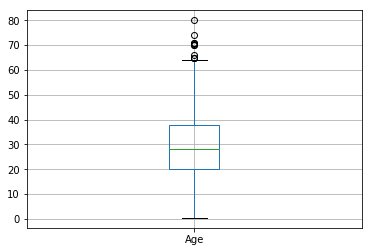

In [99]:
data.boxplot(column=['Age'])

In [100]:
(data[data.Age>65]).count()

Survived    8
Pclass      8
Sex         8
Age         8
SibSp       8
Parch       8
Fare        8
dtype: int64

In [101]:
from scipy.stats import zscore

In [107]:
(data.apply(zscore)>3).any().count()

7

ensemble model  can be trained in two ways:
    1.averaging 2.Boosting ..................
    IN the case of averaging the predictors are trained in parallel and their avarage score is the score of the model....
    In boosting preditors are applied one after the other so models anre traied in sequence.........
    voting and stacking define how the invidulal predicition from individula learners are combined together..
    Voting can be considered as everaging technique.....
    Bagging nad pasting are methods to train models on different data.
    Bagging is sample data with replacement and pasting is sample data without replacemnt.
    In boosting the learning rate and contribution can be tweaked and are hyper parameters.
    In AdaBoost each model pays more attension to the training instances the previous model got wrong
    and in Gradient Boosting each model fits on the residual error of the previous model.
    There are two types voting: hard voting (only in classification) and soft voting..
    In stacking the a new model is created for combining the output of individual learners.A new model is created using the 
    new model called blender or  meta learner.
    

Simple Ensemble Techniques:max voting ,averaging,weighted averaging..
Advance techniques: Stacking,Blending,Bagging,Boosting....



Bagging algorithms:Bagging meta-estimator,Random forest--------
Boosting algorithms:AdaBoost,GBM,XGBM,Light GBM,CatBoost

BaggingRegressor :base_estimator,n_estimators,

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RF=RandomForestClassifier()

In [ ]:
Advance techniques: Stacking,Blending,Bagging,Boosting,

In [1]:
#requirements:StratifiedKFold understanding
Def Stacking()

SyntaxError: invalid syntax (<ipython-input-1-adb27f547369>, line 2)

In [2]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
SVM hyperparameter:
    kernel=['liner','rbf','poly']
    gammas=[.1,1,2,4,8] --it is used only with nonliner hyperplane i.e rbf,poly
    C=[1,2,3,4] higher C tends to overfit as it imposes heavy penay on error
    degree

SyntaxError: invalid syntax (<ipython-input-2-97576ef4a4b4>, line 2)

In [4]:
#train[‘Pclass’] = train[‘Pclass’].apply(str)
#for col in train.dtypes[train.dtypes == ‘object’].index:
# for_dummy = train.pop(col)
# train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
criterion=’gini’,
max_depths = np.linspace(1, 32, 32, endpoint=True)
#max_depth

#min_samples_split
#min_samples_leaf 
#max_features = list(range(1,train.shape[1]))

SyntaxError: invalid character in identifier (<ipython-input-4-d7a3178d6de7>, line 5)

In [15]:
'''from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)'''
#min_samples_split
#min_samples_leaf 
#max_features = list(range(1,train.shape[1]))


'from sklearn.metrics import roc_curve, auc\nfalse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)\nroc_auc = auc(false_positive_rate, true_positive_rate)'

In [8]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [12]:
print(min_samples_splits)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [13]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [14]:
print(min_samples_leafs)

[0.1 0.2 0.3 0.4 0.5]


In [16]:
max_features = list(range(1,train.shape[1]))

NameError: name 'train' is not defined

In [1]:
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

SyntaxError: invalid syntax (<ipython-input-1-30b362612a83>, line 1)